In [1]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
import numpy as np

In [2]:
import pandas as pd

In [3]:
Data_set = np.loadtxt("data3/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]

In [4]:
Data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [5]:
Data_set.shape

(470, 17)

In [6]:
y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [7]:
model = Sequential()

In [8]:
model.add(Dense(30,input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [10]:
model.fit(X,y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 2.9957 - accuracy: 0.3638
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 946us/step - loss: 0.4615 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8511


In [11]:
#model.predict()

In [12]:
#470건 데이터, 16

# 예측모델 만들기

In [13]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [14]:
mx = np.mean(x)

my = np.mean(y)

print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [15]:
# 기울기
divisor = sum([(i - mx)**2 for i in x])  # 각각의 데이터에서 평균을 뺀 것의 제곱의 합계
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [16]:
# 기울기
a = dividend / divisor
a

2.3

In [17]:
#y절편
b = my - (mx*a)
b

79.0

In [18]:
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [19]:
# 평균제곱오차
def predict(x):
    return a * x + b # 2.3*X + 79 :  회기모델

In [20]:
predict_result = []

In [21]:
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


# 선형회귀모델

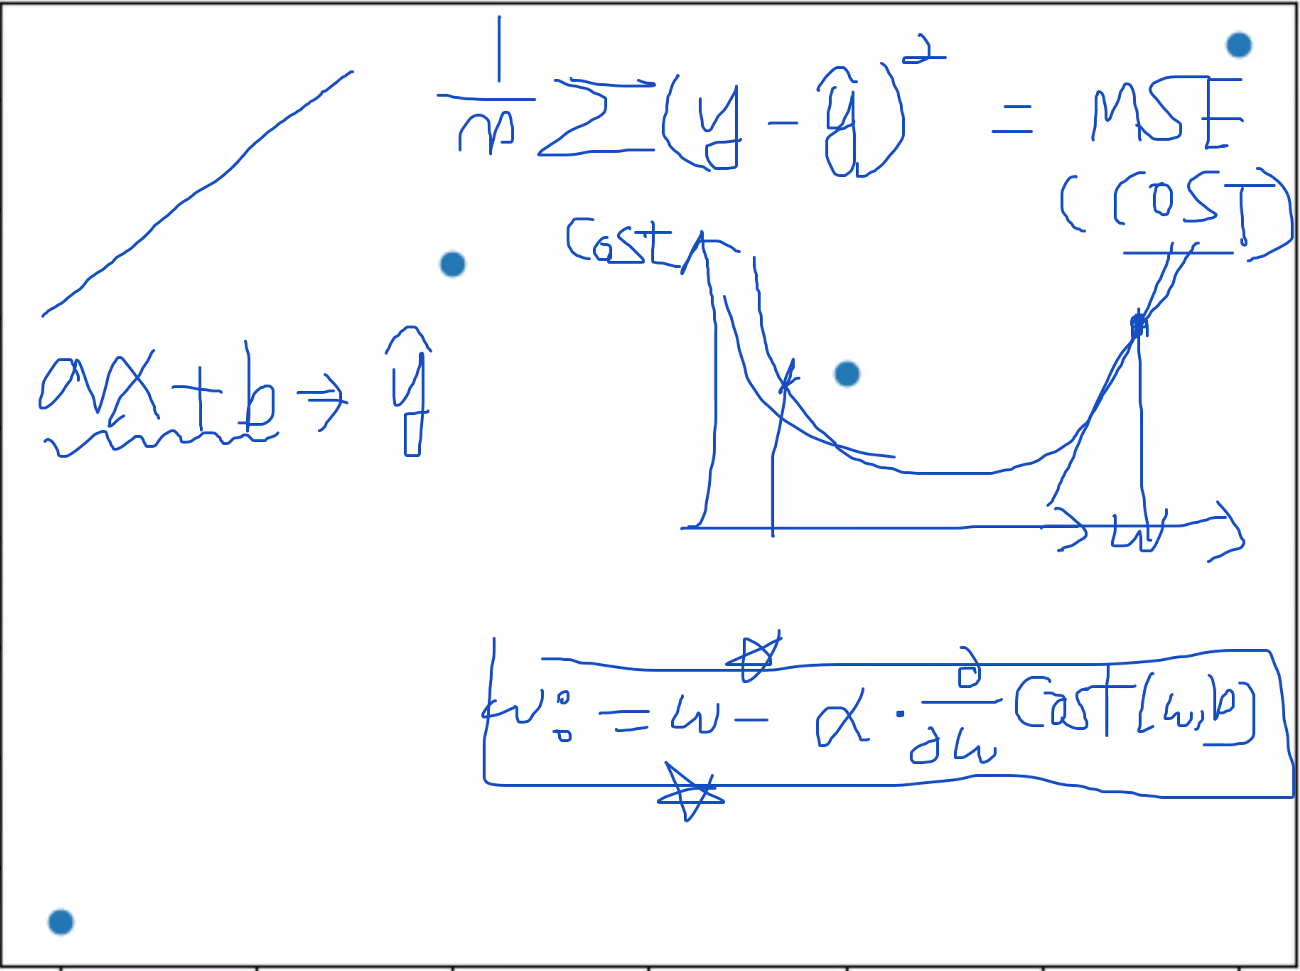

In [22]:
import matplotlib.pyplot as plt

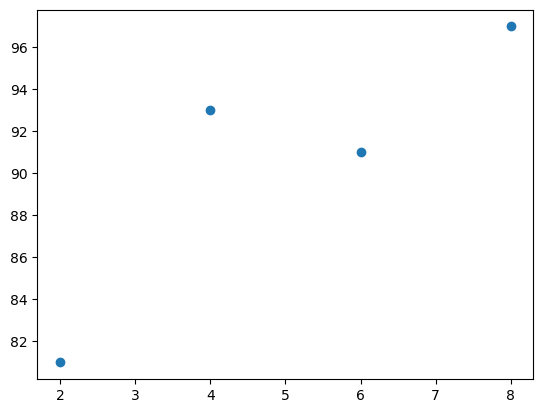

In [23]:
plt.scatter(x,y)
plt.show()

In [24]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

In [25]:
#학습률을 정합니다.
lr = 0.03

In [26]:
#몇 번 반복될지를 설정합니다. 
epochs = 2001

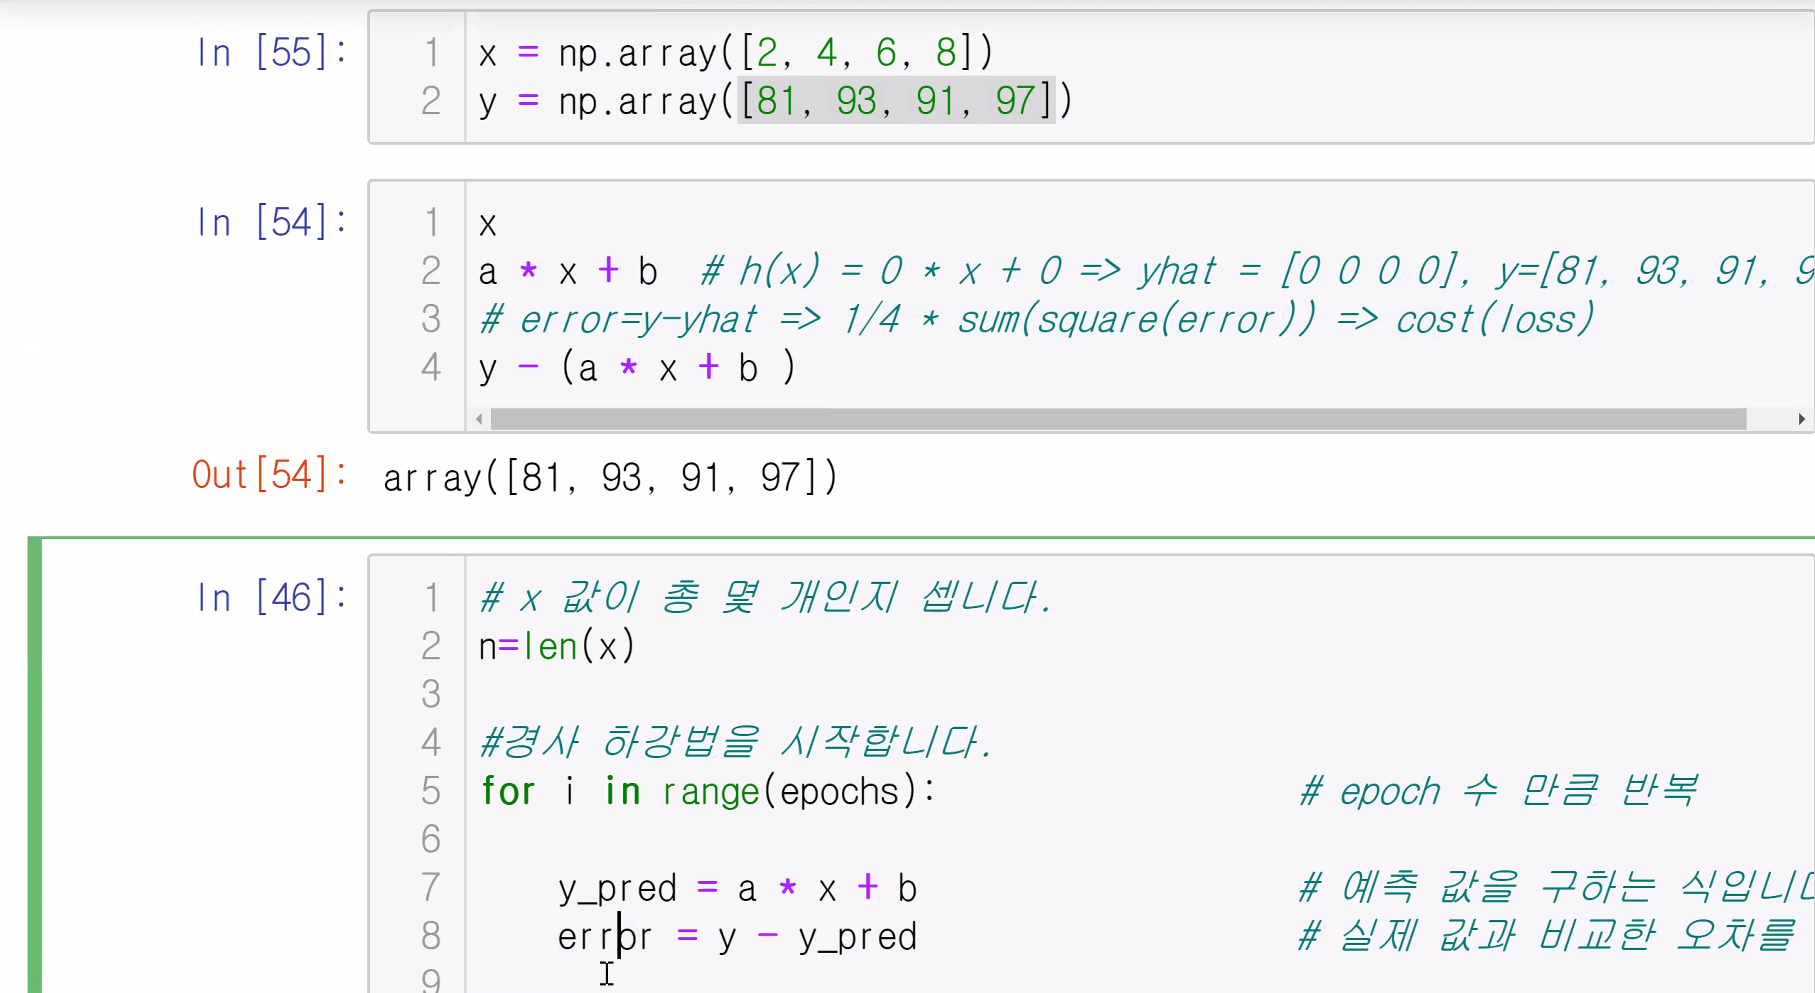"

In [27]:
# 경사하강법 구현
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


In [34]:
a

2.3000000409418653

In [35]:
b

78.99999975567644

In [37]:
# 모델의 예측값
hx=a*x+b
hx

array([83.59999984, 88.19999992, 92.8       , 97.40000008])

In [41]:
x

array([2, 4, 6, 8])

In [38]:
#실제값
y

array([81, 93, 91, 97])

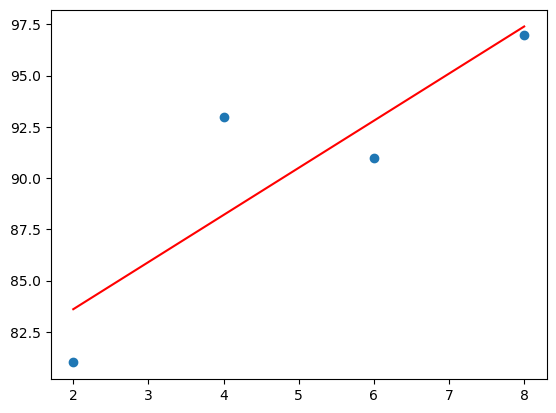

In [40]:
# 빨간선이 우리 모델
plt.scatter(x, y)
plt.plot(x, hx,'r')
plt.show()

# 로지스틱 회귀모델

In [43]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [44]:
odel = Sequential()

In [45]:
model = Sequential()

In [46]:
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [47]:
model.compile(optimizer='sgd' ,loss='binary_crossentropy')

In [48]:
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 224ms/step - loss: 1.8718
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.5662
Epoch 3/5000
1/1 [==============================] - 0s 0s/step - loss: 1.2965
Epoch 4/5000
1/1 [==============================] - 0s 0s/step - loss: 1.0734
Epoch 5/5000
1/1 [==============================] - 0s 0s/step - loss: 0.9034
Epoch 6/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7841
Epoch 7/5000
1/1 [==============================] - 0s 0s/step - loss: 0.7054
Epoch 8/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6549
Epoch 9/5000
1/1 [==============================] - 0s 258us/step - loss: 0.6226
Epoch 10/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6015
Epoch 11/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5875
Epoch 12/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5779
Epoch 13/5000
1/1 [==============================] -

1/1 [==============================] - 0s 0s/step - loss: 0.5315
Epoch 105/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5312
Epoch 106/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5310
Epoch 107/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5307
Epoch 108/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5305
Epoch 109/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5302
Epoch 110/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5300
Epoch 111/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5297
Epoch 112/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5295
Epoch 113/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5292
Epoch 114/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5290
Epoch 115/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5287
Epoch 116/5000
1/1 [==============================] 

1/1 [==============================] - 0s 0s/step - loss: 0.5072
Epoch 207/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5070
Epoch 208/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5068
Epoch 209/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5066
Epoch 210/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5063
Epoch 211/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5061
Epoch 212/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5059
Epoch 213/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5056
Epoch 214/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5054
Epoch 215/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5052
Epoch 216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5050
Epoch 217/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5047
Epoch 218/5000
1/1 [==============================] 

1/1 [==============================] - 0s 0s/step - loss: 0.4850
Epoch 309/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4848
Epoch 310/5000
1/1 [==============================] - 0s 968us/step - loss: 0.4846
Epoch 311/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4844
Epoch 312/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4842
Epoch 313/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4840
Epoch 314/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4838
Epoch 315/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4836
Epoch 316/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4834
Epoch 317/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4831
Epoch 318/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4829
Epoch 319/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4827
Epoch 320/5000
1/1 [==============================

1/1 [==============================] - 0s 0s/step - loss: 0.4646
Epoch 411/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4644
Epoch 412/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4643
Epoch 413/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4641
Epoch 414/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4639
Epoch 415/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4637
Epoch 416/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4635
Epoch 417/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4633
Epoch 418/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4631
Epoch 419/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4629
Epoch 420/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4627
Epoch 421/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4625
Epoch 422/5000
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 0.4459
Epoch 513/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4457
Epoch 514/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4456
Epoch 515/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 516/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4452
Epoch 517/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4450
Epoch 518/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4449
Epoch 519/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4447
Epoch 520/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4445
Epoch 521/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4443
Epoch 522/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4442
Epoch 523/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4440
Epoch 524/5000
1/1 [==============================] 

1/1 [==============================] - 0s 0s/step - loss: 0.4287
Epoch 615/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4285
Epoch 616/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4284
Epoch 617/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4282
Epoch 618/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4281
Epoch 619/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4279
Epoch 620/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4277
Epoch 621/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4276
Epoch 622/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4274
Epoch 623/5000
1/1 [==============================] - 0s 983us/step - loss: 0.4273
Epoch 624/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4271
Epoch 625/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4269
Epoch 626/5000
1/1 [==============================

1/1 [==============================] - 0s 886us/step - loss: 0.4129
Epoch 717/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4127
Epoch 718/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4126
Epoch 719/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4124
Epoch 720/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4123
Epoch 721/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4121
Epoch 722/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4120
Epoch 723/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4118
Epoch 724/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4117
Epoch 725/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4115
Epoch 726/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4114
Epoch 727/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4112
Epoch 728/5000
1/1 [============================

1/1 [==============================] - 0s 0s/step - loss: 0.3983
Epoch 819/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3981
Epoch 820/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3980
Epoch 821/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3978
Epoch 822/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3977
Epoch 823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3976
Epoch 824/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3974
Epoch 825/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3973
Epoch 826/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3972
Epoch 827/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3970
Epoch 828/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3969
Epoch 829/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3968
Epoch 830/5000
1/1 [==============================]

1/1 [==============================] - 0s 0s/step - loss: 0.3848
Epoch 921/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3846
Epoch 922/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3845
Epoch 923/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3844
Epoch 924/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.3843
Epoch 925/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3841
Epoch 926/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3840
Epoch 927/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3839
Epoch 928/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3838
Epoch 929/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3836
Epoch 930/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3835
Epoch 931/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3834
Epoch 932/5000
1/1 [==============================]

1/1 [==============================] - 0s 0s/step - loss: 0.3724
Epoch 1022/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3723
Epoch 1023/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3722
Epoch 1024/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3721
Epoch 1025/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3719
Epoch 1026/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3718
Epoch 1027/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3717
Epoch 1028/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3716
Epoch 1029/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3715
Epoch 1030/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3714
Epoch 1031/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3712
Epoch 1032/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3711
Epoch 1033/5000
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 0.3611
Epoch 1122/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3610
Epoch 1123/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3608
Epoch 1124/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3607
Epoch 1125/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3606
Epoch 1126/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3605
Epoch 1127/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3604
Epoch 1128/5000
1/1 [==============================] - 0s 473us/step - loss: 0.3603
Epoch 1129/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3602
Epoch 1130/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3601
Epoch 1131/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3600
Epoch 1132/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3599
Epoch 1133/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.3505
Epoch 1222/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3504
Epoch 1223/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3503
Epoch 1224/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3502
Epoch 1225/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3501
Epoch 1226/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3500
Epoch 1227/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3499
Epoch 1228/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3498
Epoch 1229/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3497
Epoch 1230/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3496
Epoch 1231/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3495
Epoch 1232/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.3494
Epoch 1233/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.3407
Epoch 1322/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3406
Epoch 1323/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3405
Epoch 1324/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3404
Epoch 1325/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3403
Epoch 1326/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3402
Epoch 1327/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.3401
Epoch 1328/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3400
Epoch 1329/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3399
Epoch 1330/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3398
Epoch 1331/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3397
Epoch 1332/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.3396
Epoch 1333/5000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: 0.3315
Epoch 1422/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3314
Epoch 1423/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3313
Epoch 1424/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3312
Epoch 1425/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3311
Epoch 1426/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3310
Epoch 1427/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3310
Epoch 1428/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3309
Epoch 1429/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3308
Epoch 1430/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3307
Epoch 1431/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3306
Epoch 1432/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3305
Epoch 1433/5000
1/1 [===================

1/1 [==============================] - 0s 17ms/step - loss: 0.3229
Epoch 1522/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3228
Epoch 1523/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3227
Epoch 1524/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3227
Epoch 1525/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3226
Epoch 1526/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3225
Epoch 1527/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3224
Epoch 1528/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3223
Epoch 1529/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3222
Epoch 1530/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.3222
Epoch 1531/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3221
Epoch 1532/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3220
Epoch 1533/5000
1/1 [===============

1/1 [==============================] - 0s 0s/step - loss: 0.3149
Epoch 1622/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3148
Epoch 1623/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3147
Epoch 1624/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3146
Epoch 1625/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3146
Epoch 1626/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3145
Epoch 1627/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3144
Epoch 1628/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 1629/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3142
Epoch 1630/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3142
Epoch 1631/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3141
Epoch 1632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3140
Epoch 1633/5000
1/1 [===============

1/1 [==============================] - 0s 0s/step - loss: 0.3073
Epoch 1722/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3073
Epoch 1723/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.3072
Epoch 1724/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3071
Epoch 1725/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 1726/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3070
Epoch 1727/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 1728/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3068
Epoch 1729/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 1730/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3067
Epoch 1731/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3066
Epoch 1732/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 1733/5000
1/1 [============

1/1 [==============================] - 0s 0s/step - loss: 0.3002
Epoch 1822/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3002
Epoch 1823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3001
Epoch 1824/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3000
Epoch 1825/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3000
Epoch 1826/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2999
Epoch 1827/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2998
Epoch 1828/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2998
Epoch 1829/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2997
Epoch 1830/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2996
Epoch 1831/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2996
Epoch 1832/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2995
Epoch 1833/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2936
Epoch 1922/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2935
Epoch 1923/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2934
Epoch 1924/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2934
Epoch 1925/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2933
Epoch 1926/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2932
Epoch 1927/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2932
Epoch 1928/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2931
Epoch 1929/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2930
Epoch 1930/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2930
Epoch 1931/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2929
Epoch 1932/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2929
Epoch 1933/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2873
Epoch 2022/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2872
Epoch 2023/5000
1/1 [==============================] - 0s 861us/step - loss: 0.2871
Epoch 2024/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2871
Epoch 2025/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2870
Epoch 2026/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2870
Epoch 2027/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2869
Epoch 2028/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2868
Epoch 2029/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2868
Epoch 2030/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2867
Epoch 2031/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2867
Epoch 2032/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2866
Epoch 2033/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.2813
Epoch 2122/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2813
Epoch 2123/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2812
Epoch 2124/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2812
Epoch 2125/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2811
Epoch 2126/5000
1/1 [==============================] - 0s 942us/step - loss: 0.2810
Epoch 2127/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2810
Epoch 2128/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2809
Epoch 2129/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2809
Epoch 2130/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2808
Epoch 2131/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2808
Epoch 2132/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2807
Epoch 2133/5000
1/1 [==================

1/1 [==============================] - 0s 16ms/step - loss: 0.2757
Epoch 2222/5000
1/1 [==============================] - 0s 495us/step - loss: 0.2757
Epoch 2223/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2756
Epoch 2224/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2755
Epoch 2225/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2755
Epoch 2226/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2754
Epoch 2227/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2754
Epoch 2228/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2753
Epoch 2229/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2753
Epoch 2230/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2752
Epoch 2231/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2752
Epoch 2232/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2751
Epoch 2233/5000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.2704
Epoch 2322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2703
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2703
Epoch 2324/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 2325/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 2326/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2701
Epoch 2327/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2701
Epoch 2328/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2700
Epoch 2329/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2700
Epoch 2330/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2699
Epoch 2331/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2699
Epoch 2332/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2698
Epoch 2333/5000
1/1 [===============

1/1 [==============================] - 0s 0s/step - loss: 0.2653
Epoch 2422/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2653
Epoch 2423/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2652
Epoch 2424/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2652
Epoch 2425/5000
1/1 [==============================] - 0s 341us/step - loss: 0.2651
Epoch 2426/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2651
Epoch 2427/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2650
Epoch 2428/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2650
Epoch 2429/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2649
Epoch 2430/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2649
Epoch 2431/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2648
Epoch 2432/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2648
Epoch 2433/5000
1/1 [==================

1/1 [==============================] - 0s 2ms/step - loss: 0.2605
Epoch 2522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2605
Epoch 2523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 2524/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 2525/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 2526/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 2527/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2602
Epoch 2528/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2602
Epoch 2529/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2602
Epoch 2530/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2601
Epoch 2531/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2601
Epoch 2532/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2600
Epoch 2533/5000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 0.2560
Epoch 2622/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2559
Epoch 2623/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2559
Epoch 2624/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2558
Epoch 2625/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2558
Epoch 2626/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2557
Epoch 2627/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2557
Epoch 2628/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2557
Epoch 2629/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2556
Epoch 2630/5000
1/1 [==============================] - 0s 940us/step - loss: 0.2556
Epoch 2631/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2555
Epoch 2632/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2555
Epoch 2633/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2516
Epoch 2722/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2516
Epoch 2723/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2515
Epoch 2724/5000
1/1 [==============================] - 0s 951us/step - loss: 0.2515
Epoch 2725/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2514
Epoch 2726/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2514
Epoch 2727/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2514
Epoch 2728/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2513
Epoch 2729/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2513
Epoch 2730/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2512
Epoch 2731/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2512
Epoch 2732/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2512
Epoch 2733/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 2822/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2474
Epoch 2823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2474
Epoch 2824/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2474
Epoch 2825/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 2826/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 2827/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2472
Epoch 2828/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2472
Epoch 2829/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2471
Epoch 2830/5000
1/1 [==============================] - 0s 428us/step - loss: 0.2471
Epoch 2831/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2471
Epoch 2832/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2470
Epoch 2833/5000
1/1 [================

1/1 [==============================] - 0s 0s/step - loss: 0.2435
Epoch 2922/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2435
Epoch 2923/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 2924/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2434
Epoch 2925/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 2926/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2433
Epoch 2927/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2433
Epoch 2928/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2432
Epoch 2929/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2432
Epoch 2930/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2432
Epoch 2931/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2431
Epoch 2932/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2431
Epoch 2933/5000
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 0.2397
Epoch 3022/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2397
Epoch 3023/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2397
Epoch 3024/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2396
Epoch 3025/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2396
Epoch 3026/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2395
Epoch 3027/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2395
Epoch 3028/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2395
Epoch 3029/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2394
Epoch 3030/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2394
Epoch 3031/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2394
Epoch 3032/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2393
Epoch 3033/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2361
Epoch 3122/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2361
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2360
Epoch 3124/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2360
Epoch 3125/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2360
Epoch 3126/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2359
Epoch 3127/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2359
Epoch 3128/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2359
Epoch 3129/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2358
Epoch 3130/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 3131/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 3132/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2357
Epoch 3133/5000
1/1 [=============

1/1 [==============================] - 0s 0s/step - loss: 0.2327
Epoch 3222/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2326
Epoch 3223/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.2326
Epoch 3224/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2325
Epoch 3225/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2325
Epoch 3226/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2325
Epoch 3227/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2324
Epoch 3228/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.2324
Epoch 3229/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2324
Epoch 3230/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2323
Epoch 3231/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2323
Epoch 3232/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2323
Epoch 3233/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 3322/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2293
Epoch 3323/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 3324/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2292
Epoch 3325/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2292
Epoch 3326/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2292
Epoch 3327/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2291
Epoch 3328/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2291
Epoch 3329/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2291
Epoch 3330/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2290
Epoch 3331/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2290
Epoch 3332/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2290
Epoch 3333/5000
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 0.2261
Epoch 3422/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2261
Epoch 3423/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2261
Epoch 3424/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2260
Epoch 3425/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2260
Epoch 3426/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2260
Epoch 3427/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2260
Epoch 3428/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 3429/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 3430/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 3431/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2258
Epoch 3432/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2258
Epoch 3433/5000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.2231
Epoch 3522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2230
Epoch 3523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2230
Epoch 3524/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2230
Epoch 3525/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2230
Epoch 3526/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2229
Epoch 3527/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2229
Epoch 3528/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2229
Epoch 3529/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2228
Epoch 3530/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2228
Epoch 3531/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2228
Epoch 3532/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2227
Epoch 3533/5000
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 0.2201
Epoch 3622/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2201
Epoch 3623/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2201
Epoch 3624/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2200
Epoch 3625/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2200
Epoch 3626/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2200
Epoch 3627/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2200
Epoch 3628/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2199
Epoch 3629/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2199
Epoch 3630/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2199
Epoch 3631/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2198
Epoch 3632/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2198
Epoch 3633/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2173
Epoch 3722/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2173
Epoch 3723/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2172
Epoch 3724/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2172
Epoch 3725/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2172
Epoch 3726/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2172
Epoch 3727/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2171
Epoch 3728/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2171
Epoch 3729/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2171
Epoch 3730/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2170
Epoch 3731/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2170
Epoch 3732/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2170
Epoch 3733/5000
1/1 [===================

1/1 [==============================] - 0s 17ms/step - loss: 0.2146
Epoch 3822/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2145
Epoch 3823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2145
Epoch 3824/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2145
Epoch 3825/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2145
Epoch 3826/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2144
Epoch 3827/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2144
Epoch 3828/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2144
Epoch 3829/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2144
Epoch 3830/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2143
Epoch 3831/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2143
Epoch 3832/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2143
Epoch 3833/5000
1/1 [=============

1/1 [==============================] - 0s 0s/step - loss: 0.2119
Epoch 3922/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2119
Epoch 3923/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2119
Epoch 3924/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2119
Epoch 3925/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2118
Epoch 3926/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2118
Epoch 3927/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2118
Epoch 3928/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2118
Epoch 3929/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 3930/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.2117
Epoch 3931/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 3932/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 3933/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.2094
Epoch 4022/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2094
Epoch 4023/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2094
Epoch 4024/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2093
Epoch 4025/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2093
Epoch 4026/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2093
Epoch 4027/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2093
Epoch 4028/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2092
Epoch 4029/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2092
Epoch 4030/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2092
Epoch 4031/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2092
Epoch 4032/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2091
Epoch 4033/5000
1/1 [=====================

1/1 [==============================] - 0s 0s/step - loss: 0.2070
Epoch 4122/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 4123/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 4124/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2069
Epoch 4125/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 4126/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2068
Epoch 4127/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2068
Epoch 4128/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2068
Epoch 4129/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2068
Epoch 4130/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2067
Epoch 4131/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2067
Epoch 4132/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2067
Epoch 4133/5000
1/1 [====================

1/1 [==============================] - 0s 17ms/step - loss: 0.2046
Epoch 4222/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2046
Epoch 4223/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2045
Epoch 4224/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2045
Epoch 4225/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2045
Epoch 4226/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2045
Epoch 4227/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2044
Epoch 4228/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2044
Epoch 4229/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2044
Epoch 4230/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2044
Epoch 4231/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2044
Epoch 4232/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2043
Epoch 4233/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 4322/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2023
Epoch 4323/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 4324/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2022
Epoch 4325/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2022
Epoch 4326/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2022
Epoch 4327/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2022
Epoch 4328/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2021
Epoch 4329/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 4330/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 4331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 4332/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 4333/5000
1/1 [===============

1/1 [==============================] - 0s 17ms/step - loss: 0.2001
Epoch 4422/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2001
Epoch 4423/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2000
Epoch 4424/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2000
Epoch 4425/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2000
Epoch 4426/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2000
Epoch 4427/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2000
Epoch 4428/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1999
Epoch 4429/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1999
Epoch 4430/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1999
Epoch 4431/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1999
Epoch 4432/5000
1/1 [==============================] - 0s 963us/step - loss: 0.1998
Epoch 4433/5000
1/1 [================

1/1 [==============================] - 0s 17ms/step - loss: 0.1979
Epoch 4522/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1979
Epoch 4523/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1979
Epoch 4524/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.1979
Epoch 4525/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1979
Epoch 4526/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1978
Epoch 4527/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1978
Epoch 4528/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1978
Epoch 4529/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1978
Epoch 4530/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1978
Epoch 4531/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1977
Epoch 4532/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1977
Epoch 4533/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.1959
Epoch 4622/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1959
Epoch 4623/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.1958
Epoch 4624/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1958
Epoch 4625/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1958
Epoch 4626/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1958
Epoch 4627/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1957
Epoch 4628/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.1957
Epoch 4629/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1957
Epoch 4630/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1957
Epoch 4631/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1957
Epoch 4632/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1956
Epoch 4633/5000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 0.1939
Epoch 4722/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.1938
Epoch 4723/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1938
Epoch 4724/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1938
Epoch 4725/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1938
Epoch 4726/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1938
Epoch 4727/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.1937
Epoch 4728/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1937
Epoch 4729/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1937
Epoch 4730/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1937
Epoch 4731/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1937
Epoch 4732/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1936
Epoch 4733/5000
1/1 [===================

1/1 [==============================] - 0s 17ms/step - loss: 0.1919
Epoch 4822/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1919
Epoch 4823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1919
Epoch 4824/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1919
Epoch 4825/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1918
Epoch 4826/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.1918
Epoch 4827/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1918
Epoch 4828/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1918
Epoch 4829/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1918
Epoch 4830/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1917
Epoch 4831/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1917
Epoch 4832/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1917
Epoch 4833/5000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 0.1900
Epoch 4922/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1900
Epoch 4923/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1900
Epoch 4924/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.1900
Epoch 4925/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1899
Epoch 4926/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1899
Epoch 4927/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1899
Epoch 4928/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1899
Epoch 4929/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.1899
Epoch 4930/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1899
Epoch 4931/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1898
Epoch 4932/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1898
Epoch 4933/5000
1/1 [================

#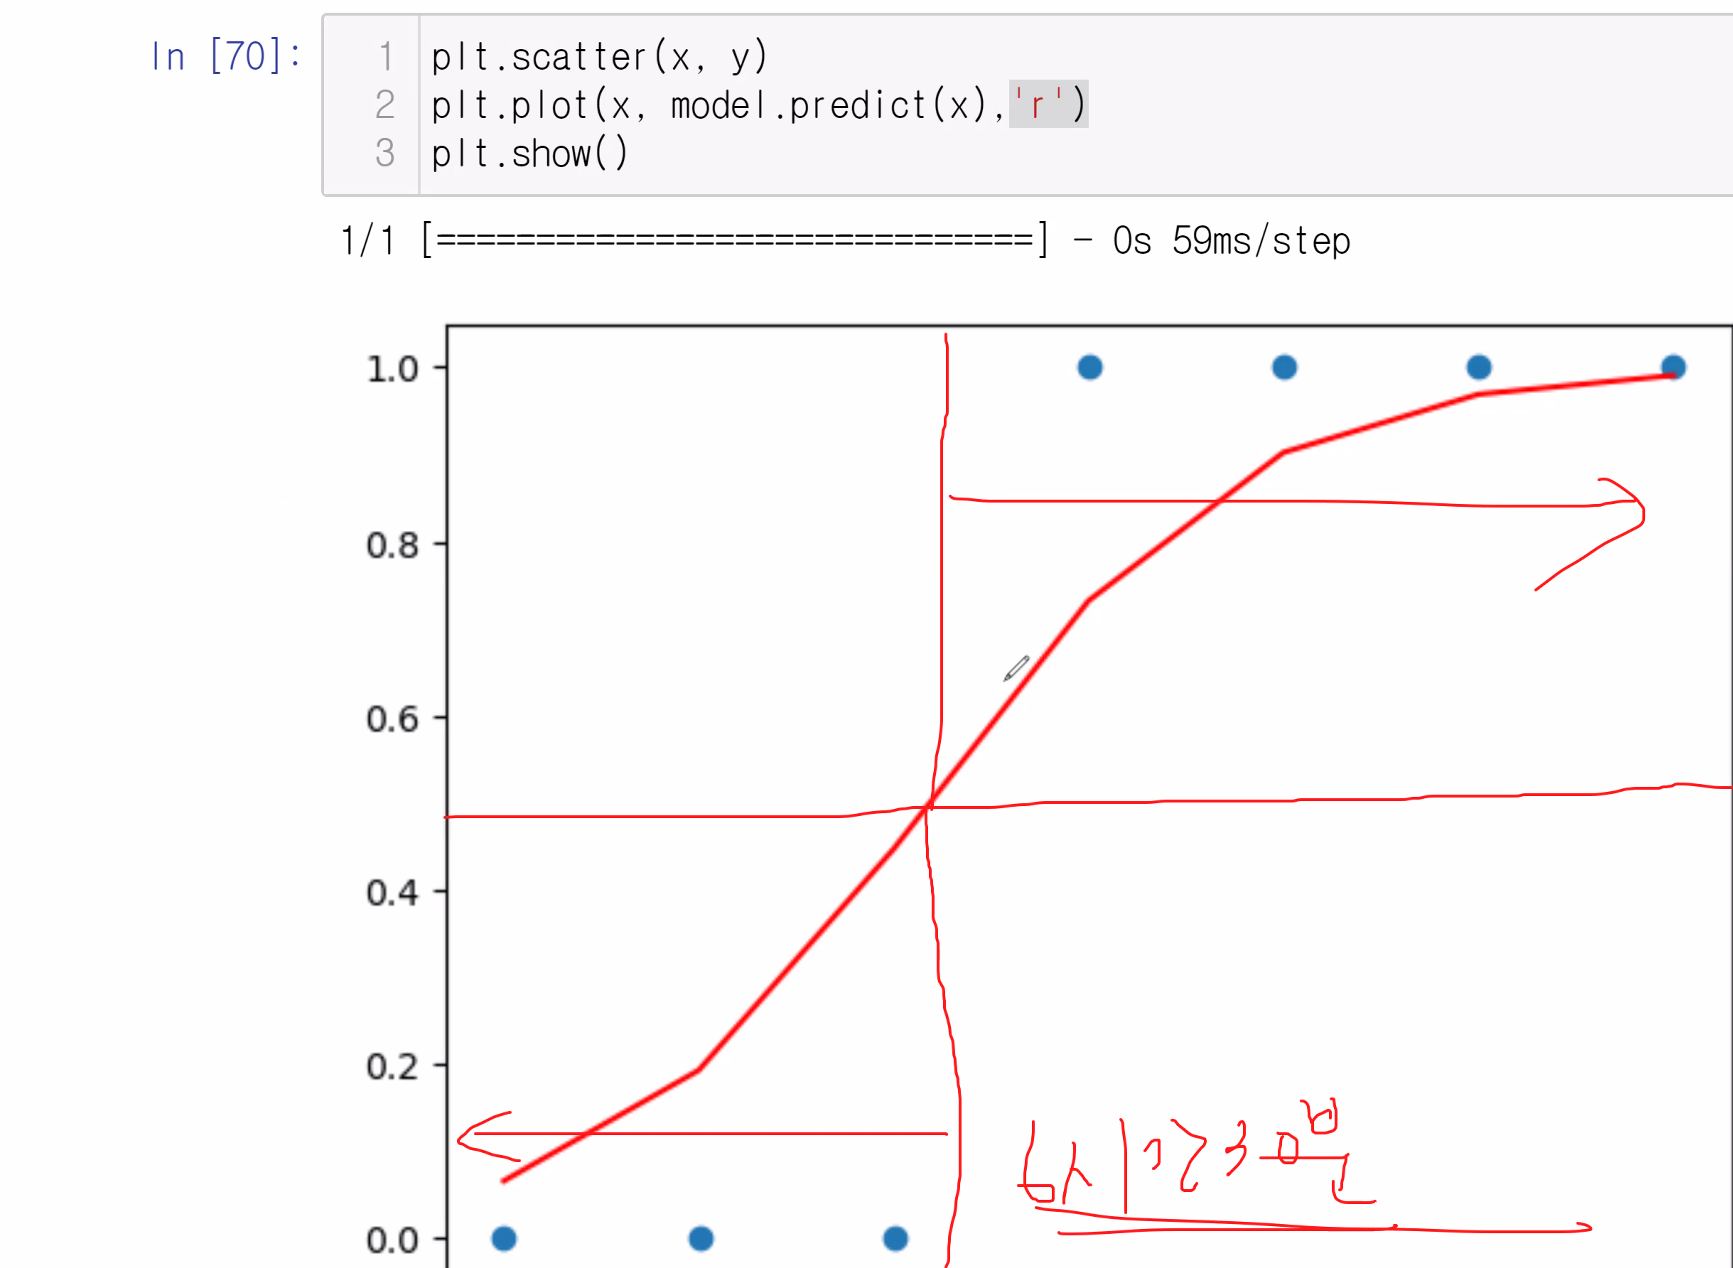

1/1 [==============================] - 0s 15ms/step


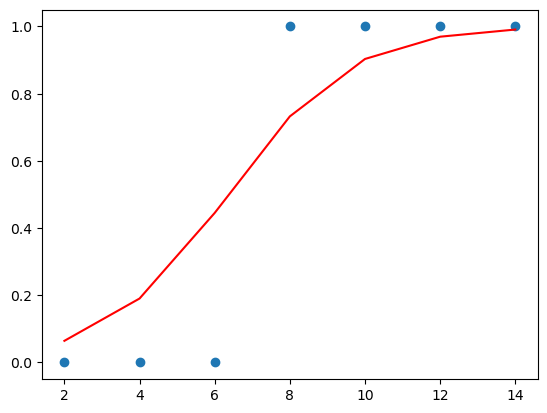

In [51]:
# 점이 실제값 빨간선이 예측값
# 0.5를 기준으로 아래가 불합격, 위가 합격
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [55]:
# model.predict(7)는 에러가 나옴
model.predict([7]) #59%

1/1 [==============================] - 0s 33ms/step


array([[0.5970685]], dtype=float32)

In [56]:
model.predict([7])[0][0]*100

1/1 [==============================] - 0s 28ms/step


59.70684885978699

In [57]:
if model.predict([7])[0][0]*100>50:
    print("합격으로 예상")
else:
    print("불합격으로 예상")

1/1 [==============================] - 0s 19ms/step
합격으로 예상


# 다층 퍼셉트론